# Import all the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import f1_score
plt.rcParams["figure.figsize"] = (8, 6)

# Load data

In [2]:
df_train = pd.read_csv('../dataset/churnrate/train.csv').fillna(method='backfill')
df_test = pd.read_csv('../dataset/churnrate/test.csv').fillna(method='backfill')

In [3]:
print(df_train.shape)
df_train.head()

(36992, 25)


,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,500.69,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
X = df_train.iloc[:,:-1]
y = df_train.iloc[:,-1]
del df_train

# Visualize data

In [5]:
X.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.676246
std,15.867412,228.819900,398.289149,19444.806226,194.492744
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236
25%,23.000000,8.000000,60.102500,14177.540000,616.320000
50%,37.000000,12.000000,161.765000,27554.485000,697.795000
75%,51.000000,16.000000,356.515000,40855.110000,763.740000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761


In [6]:
y.describe()

count    36992.000000
mean         3.463397
std          1.409661
min         -1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: churn_risk_score, dtype: float64

In [7]:
total = 0
cscore = dict()
for i in [-1, 1, 2, 3, 4, 5]:
#     print(f"{i}: ",x:=y[y == i].count())
    cscore[i] = y[y==i].count()
    total += cscore[i]
print(total)

36992


In [8]:
x_axis = list()
y_axis = list()
for key, value in cscore.items():
    x_axis.append(key)
    y_axis.append(value)

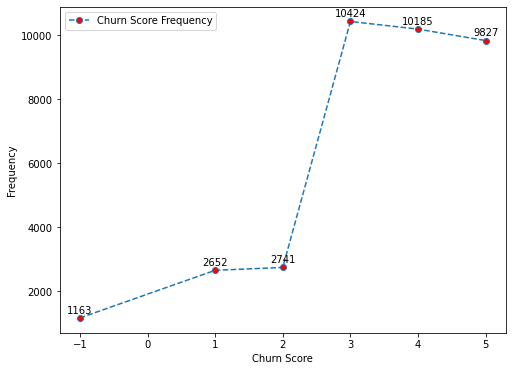

In [9]:
plt.plot(x_axis, y_axis, markerfacecolor='red', marker='o', linestyle='--', label='Churn Score Frequency')
plt.xlabel('Churn Score')
plt.ylabel('Frequency')
plt.legend()

for key, value in cscore.items():
    plt.annotate(
        value,
        (key, value),
        textcoords='offset points',
        xytext=(0,5),
        ha='center'
    )
plt.show()

In [10]:
xaxis=list()
xaxis.append(X[X['gender'] == 'M'].shape[0])
xaxis.append(X[X['gender'] == 'F'].shape[0])
xaxis.append(X[X['gender'] == 'Unknown'].shape[0])

In [11]:
xaxis

[18443, 18490, 59]

# Preprocess data

In [14]:
X.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,16,306.34,12838.38,10.0,500.69,Yes,No,Yes,Solved,Quality Customer Care
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               36992 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36992 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [16]:
X.drop(columns=['customer_id', 'Name', 'security_no', 'joining_date', 'referral_id', 'last_visit_time'], inplace=True)
X.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock
1,32,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,500.69,Yes,No,Yes,Solved,Quality Customer Care
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website


In [17]:
cat = [
    'gender',
    'region_category',
    'membership_category',
    'joined_through_referral',
    'internet_option',
    'used_special_discount',
    'preferred_offer_types',
    'past_complaint',
    'offer_application_preference',
    'complaint_status',
    'feedback',
    'medium_of_operation'
]

cat_dict = {}
for subcat in cat:
    cat_dict[subcat] = list(X[subcat].unique())
    print(subcat+": ", end="")
    print(*cat_dict[subcat], sep=", ")
    print()

gender: F, M, Unknown

region_category: Village, City, Town

membership_category: Platinum Membership, Premium Membership, No Membership, Gold Membership, Silver Membership, Basic Membership

joined_through_referral: No, ?, Yes

internet_option: Wi-Fi, Mobile_Data, Fiber_Optic

used_special_discount: Yes, No

preferred_offer_types: Gift Vouchers/Coupons, Credit/Debit Card Offers, Without Offers

past_complaint: No, Yes

offer_application_preference: Yes, No

complaint_status: Not Applicable, Solved, Solved in Follow-up, Unsolved, No Information Available

feedback: Products always in Stock, Quality Customer Care, Poor Website, No reason specified, Poor Product Quality, Poor Customer Service, Too many ads, User Friendly Website, Reasonable Price

medium_of_operation: ?, Desktop, Smartphone, Both



In [18]:
def cat_region(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['region_category']):
        dct[x] = i
    for index in range(df.shape[0]):
        df.iat[index, 2] = dct[df.iat[index, 2]]

def cat_membership(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['membership_category']):
        dct[x] = i
    for index in range(df.shape[0]):
        df.iat[index, 3] = dct[df.iat[index, 3]]

def cat_gender(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['gender']):
        dct[x] = i
    for index in range(df.shape[0]):
        df.iat[index, 1] = dct[df.iat[index, 1]]

def cat_internet(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['internet_option']):
        dct[x] = i
    for index in range(df.shape[0]):
        df.iat[index, 7] = dct[df.iat[index, 7]]

def cat_referral(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['joined_through_referral']):
        dct[x] = i
    print(dct)
    for index in range(df.shape[0]):
        df.iat[index, 4] = dct[df.iat[index, 4]]

def cat_discount(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['used_special_discount']):
        dct[x] = i
    for index in range(df.shape[0]):
        df.iat[index, -5] = dct[df.iat[index, -5]]

def cat_offer(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['preferred_offer_types']):
        dct[x] = i
    for index in range(df.shape[0]):
        df.iat[index, 5] = dct[df.iat[index, 5]]

def cat_complaint(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['past_complaint']):
        dct[x] = i
    for index in range(df.shape[0]):
        df.iat[index, -3] = dct[df.iat[index, -3]]

def cat_application(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['offer_application_preference']):
        dct[x] = i
    for index in range(df.shape[0]):
        df.iat[index, -4] = dct[df.iat[index, -4]]

def cat_status(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['complaint_status']):
        dct[x] = i
    for index in range(df.shape[0]):
        df.iat[index, -2] = dct[df.iat[index, -2]]

def cat_feedback(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['feedback']):
        dct[x] = i
    for index in range(df.shape[0]):
        df.iat[index, -1] = dct[df.iat[index, -1]]

def cat_medium(df, cat_dict):
    dct = {}
    for i, x in enumerate(cat_dict['medium_of_operation']):
        dct[x] = i
    for index in range(df.shape[0]):
        df.iat[index, 6] = dct[df.iat[index, 6]]

In [19]:
cat_region(X, cat_dict)
cat_membership(X, cat_dict)
cat_gender(X, cat_dict)
cat_internet(X, cat_dict)
cat_referral(X, cat_dict)
cat_discount(X, cat_dict)
cat_offer(X, cat_dict)
cat_complaint(X, cat_dict)
cat_application(X, cat_dict)
cat_status(X, cat_dict)
cat_feedback(X, cat_dict)
cat_medium(X, cat_dict)

{'No': 0, '?': 1, 'Yes': 2}


In [20]:
X.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,18,0,0,0,0,0,0,0,17,300.63,53005.25,17.0,781.75,0,0,0,0,0
1,32,0,1,1,1,0,1,1,16,306.34,12838.38,10.0,500.69,0,1,1,1,1
2,44,0,2,2,2,0,1,0,14,516.16,21027.00,22.0,500.69,1,0,1,2,2
3,37,1,1,2,2,0,1,1,11,53.27,25239.56,6.0,567.66,1,0,1,3,2
4,31,0,1,2,0,1,2,1,20,113.13,24483.66,16.0,663.06,1,0,1,1,2


In [21]:
y.head()

0    2
1    1
2    5
3    5
4    5
Name: churn_risk_score, dtype: int64

In [22]:
y[y == -1].shape

(1163,)

In [23]:
print("Rows with Churn score of -1: {:.2f}%".format(1163/369.92))

Rows with Churn score of -1: 3.14%


In [24]:
index_to_remove = set()
index_to_remove.update(X.loc[X['gender'] == 'Unknown'].index)

In [25]:
index_to_remove.update(X.loc[X['joined_through_referral'] == '?'].index)

In [26]:
index_to_remove.update(X.loc[X['medium_of_operation'] == '?'].index)

In [27]:
print("Rows with invalid inputs:", len(index_to_remove), "or {:.2f}%".format(10066/369.92))

Rows with invalid inputs: 0 or 27.21%


In [28]:
index_to_remove_y = set()
index_to_remove_y.update(y.loc[y == -1].index)

In [31]:
X.drop(index=index_to_remove_y, inplace=True)
y.drop(index=index_to_remove_y, inplace=True)

In [32]:
X = X.convert_dtypes()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           35829 non-null  Int64  
 1   gender                        35829 non-null  Int64  
 2   region_category               35829 non-null  Int64  
 3   membership_category           35829 non-null  Int64  
 4   joined_through_referral       35829 non-null  Int64  
 5   preferred_offer_types         35829 non-null  Int64  
 6   medium_of_operation           35829 non-null  Int64  
 7   internet_option               35829 non-null  Int64  
 8   days_since_last_login         35829 non-null  Int64  
 9   avg_time_spent                35829 non-null  Float64
 10  avg_transaction_value         35829 non-null  Float64
 11  avg_frequency_login_days      35829 non-null  string 
 12  points_in_wallet              35829 non-null  Float64
 13  u

In [33]:
X.drop(columns='avg_frequency_login_days', inplace=True)

In [34]:
X.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,18,0,0,0,0,0,0,0,17,300.63,53005.25,781.75,0,0,0,0,0
1,32,0,1,1,1,0,1,1,16,306.34,12838.38,500.69,0,1,1,1,1
2,44,0,2,2,2,0,1,0,14,516.16,21027.0,500.69,1,0,1,2,2
3,37,1,1,2,2,0,1,1,11,53.27,25239.56,567.66,1,0,1,3,2
4,31,0,1,2,0,1,2,1,20,113.13,24483.66,663.06,1,0,1,1,2


## Build the Model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

In [63]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [64]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [65]:
X_test = ss.fit_transform(X_test)

In [66]:
y_pred = clf.predict(X_test)
print("f1_score: {}".format(f1_score(y_test, y_pred, average='macro')))

f1_score: 0.6066875772917404


## Submission

In [46]:
df_test = pd.read_csv('../dataset/churnrate/test.csv').fillna(method='backfill')

In [42]:
df_test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [47]:
df_test.drop(columns=[
    'customer_id',
    'Name',
    'security_no',
    'joining_date',
    'referral_id',
    'last_visit_time',
    'avg_frequency_login_days'], inplace=True)
df_test.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,50,F,Village,Premium Membership,No,Without Offers,Smartphone,Wi-Fi,12,386.26,40721.44,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,41,M,Village,Gold Membership,No,Without Offers,Desktop,Fiber_Optic,11,37.80,9644.40,726.000000,Yes,No,No,Not Applicable,Poor Website
2,31,F,Town,Silver Membership,No,Gift Vouchers/Coupons,Both,Mobile_Data,18,215.36,3693.25,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,64,M,Town,Silver Membership,Yes,Credit/Debit Card Offers,?,Fiber_Optic,-999,44.57,36809.56,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,16,F,Town,No Membership,Yes,Without Offers,Smartphone,Mobile_Data,6,349.88,40675.86,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [48]:
cat_region(df_test, cat_dict)
cat_membership(df_test, cat_dict)
cat_gender(df_test, cat_dict)
cat_internet(df_test, cat_dict)
cat_referral(df_test, cat_dict)
cat_discount(df_test, cat_dict)
cat_offer(df_test, cat_dict)
cat_complaint(df_test, cat_dict)
cat_application(df_test, cat_dict)
cat_status(df_test, cat_dict)
cat_feedback(df_test, cat_dict)
cat_medium(df_test, cat_dict)

{'No': 0, '?': 1, 'Yes': 2}


In [49]:
df_test.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,50,0,0,1,0,2,2,0,12,386.26,40721.44,733.830000,0,1,0,0,4
1,41,1,0,3,0,2,1,2,11,37.80,9644.40,726.000000,0,1,0,0,2
2,31,0,2,4,0,0,3,1,18,215.36,3693.25,713.780000,0,1,1,2,3
3,64,1,2,4,2,1,0,2,-999,44.57,36809.56,744.970000,0,1,1,4,6
4,16,0,2,2,2,2,2,1,6,349.88,40675.86,299.048351,1,0,1,2,2


In [50]:
y_req = clf.predict(df_test)

In [56]:
print(y_req.shape)
y_req = pd.DataFrame(y_req, columns=['churn_risk_score'])

(19919,)


In [57]:
df_new = df_test.join(y_req)
df_new.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,50,0,0,1,0,2,2,0,12,386.26,40721.44,733.830000,0,1,0,0,4,3
1,41,1,0,3,0,2,1,2,11,37.80,9644.40,726.000000,0,1,0,0,2,3
2,31,0,2,4,0,0,3,1,18,215.36,3693.25,713.780000,0,1,1,2,3,5
3,64,1,2,4,2,1,0,2,-999,44.57,36809.56,744.970000,0,1,1,4,6,3
4,16,0,2,2,2,2,2,1,6,349.88,40675.86,299.048351,1,0,1,2,2,4


In [53]:
template = pd.read_csv("../dataset/churnrate/sample_submission.csv")

In [54]:
template.head()

,customer_id,churn_risk_score
0,fffe4300490044003600300030003800,2
1,fffe43004900440032003100300035003700,1
2,fffe4300490044003100390032003600,5
3,fffe43004900440036003000330031003600,5
4,fffe43004900440031003900350030003600,5


In [59]:
df_test = pd.read_csv('../dataset/churnrate/test.csv').fillna(method='backfill')

In [60]:
df_new = df_test.join(y_req)
df_new.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality,3
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website,3
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified,5
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads,3
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website,4


In [61]:
df_new = df_new[['customer_id', 'churn_risk_score']]
df_new.head()

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,5
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,4


In [62]:
df_new.to_csv('op1.csv', index=False)

In [67]:
df_test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [68]:
df_new.head()

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,5
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,4


In [69]:
df_test_new = df_test.drop(columns=[
    'customer_id',
    'Name',
    'security_no',
    'joining_date',
    'referral_id',
    'last_visit_time',
    'avg_frequency_login_days'])
df_test_new.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,50,F,Village,Premium Membership,No,Without Offers,Smartphone,Wi-Fi,12,386.26,40721.44,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,41,M,Village,Gold Membership,No,Without Offers,Desktop,Fiber_Optic,11,37.80,9644.40,726.000000,Yes,No,No,Not Applicable,Poor Website
2,31,F,Town,Silver Membership,No,Gift Vouchers/Coupons,Both,Mobile_Data,18,215.36,3693.25,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,64,M,Town,Silver Membership,Yes,Credit/Debit Card Offers,?,Fiber_Optic,-999,44.57,36809.56,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,16,F,Town,No Membership,Yes,Without Offers,Smartphone,Mobile_Data,6,349.88,40675.86,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [70]:
cat_region(df_test_new, cat_dict)
cat_membership(df_test_new, cat_dict)
cat_gender(df_test_new, cat_dict)
cat_internet(df_test_new, cat_dict)
cat_referral(df_test_new, cat_dict)
cat_discount(df_test_new, cat_dict)
cat_offer(df_test_new, cat_dict)
cat_complaint(df_test_new, cat_dict)
cat_application(df_test_new, cat_dict)
cat_status(df_test_new, cat_dict)
cat_feedback(df_test_new, cat_dict)
cat_medium(df_test_new, cat_dict)

{'No': 0, '?': 1, 'Yes': 2}


In [71]:
df_test_new.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,50,0,0,1,0,2,2,0,12,386.26,40721.44,733.830000,0,1,0,0,4
1,41,1,0,3,0,2,1,2,11,37.80,9644.40,726.000000,0,1,0,0,2
2,31,0,2,4,0,0,3,1,18,215.36,3693.25,713.780000,0,1,1,2,3
3,64,1,2,4,2,1,0,2,-999,44.57,36809.56,744.970000,0,1,1,4,6
4,16,0,2,2,2,2,2,1,6,349.88,40675.86,299.048351,1,0,1,2,2


In [72]:
df_test_new = ss.fit_transform(df_test_new)
y_req_new = clf.predict(df_test_new)

In [74]:
y_req_new = pd.DataFrame(y_req_new, columns=['churn_risk_score'])
y_req_new.head()

,churn_risk_score
0,3
1,4
2,4
3,3
4,5


In [75]:
df_new = df_test.join(y_req_new)
df_new.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality,3
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website,4
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified,4
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads,3
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website,5


In [76]:
df_new = df_new[['customer_id', 'churn_risk_score']]
df_new.head()

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,4
2,fffe43004900440034003800360037003000,4
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,5


In [77]:
df_new.to_csv('op2.csv', index=False)